# College Event Feedback Analysis Project

## Project Overview
Welcome to the **College Event Feedback Analysis** project! In this notebook, we'll analyze student feedback data to gain meaningful insights that can help improve campus events and educational experiences.

## Objectives
- Clean and prepare feedback data from Google Forms
- Analyze rating patterns across different categories
- Perform sentiment analysis on text feedback
- Create beautiful visualizations
- Generate actionable recommendations

## Tools We'll Use
- **pandas**: Data manipulation and analysis
- **matplotlib & seaborn**: Data visualization
- **textblob**: Sentiment analysis
- **wordcloud**: Creating word clouds
- **numpy**: Numerical operations

---

In [1]:
# Install required libraries (run this first!)
!pip install textblob wordcloud plotly -q

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries installed and imported successfully!")

All libraries installed and imported successfully!


# Data Loading and Initial Exploration

In this section, we'll load our student feedback data and take a first look at its structure.

## Dataset Information
- **Source**: Student feedback collected via Google Forms
- **Total Responses**: 1,000 students
- **Rating Scale**: 1-10 (1 = Poor, 10 = Excellent)
- **Categories**: 8 different aspects of courses/events

In [2]:
# Load the data
# Option 1: If you have the CSV file uploaded to Colab
try:
    df = pd.read_csv('student_feedback.csv')
    print("Data loaded from uploaded CSV file")
except:
    print("CSV file not found. Creating sample data for demonstration...")

    # Create sample data similar to your CSV structure
    np.random.seed(42)

    # Column names based on your CSV
    columns = [
        'Student ID',
        'Well versed with the subject',
        'Explains concepts in an understandable way',
        'Use of presentations',
        'Degree of difficulty of assignments',
        'Solves doubts willingly',
        'Structuring of the course',
        'Provides support for students going above and beyond',
        'Course recommendation based on relevance'
    ]

    # Generate sample data
    n_students = 1000
    data = {
        'Student ID': range(1, n_students + 1),
        'Well versed with the subject': np.random.randint(5, 11, n_students),
        'Explains concepts in an understandable way': np.random.randint(3, 11, n_students),
        'Use of presentations': np.random.randint(4, 11, n_students),
        'Degree of difficulty of assignments': np.random.randint(1, 11, n_students),
        'Solves doubts willingly': np.random.randint(2, 11, n_students),
        'Structuring of the course': np.random.randint(1, 11, n_students),
        'Provides support for students going above and beyond': np.random.randint(1, 11, n_students),
        'Course recommendation based on relevance': np.random.randint(1, 11, n_students)
    }

    df = pd.DataFrame(data)
    print("Sample data created successfully")

# Create sample text feedback data (in real scenario, this would come from your Google Form)
sample_feedback = [
    "The instructor was excellent and very knowledgeable about the subject",
    "Presentations were clear and well-structured",
    "The course could be better organized",
    "Assignments were too difficult and not well explained",
    "Great support from the instructor, always available for doubts",
    "The content was relevant but delivery needs improvement",
    "Loved the interactive sessions and practical examples",
    "Course structure was confusing and hard to follow",
    "Excellent teaching methodology and student engagement",
    "The instructor was not very responsive to student queries",
    "Outstanding course content and presentation quality",
    "Assignments were challenging but fair and educational",
    "Poor organization of course materials",
    "The instructor was very supportive and encouraging",
    "Course was well-designed and met all learning objectives"
]

# Extend sample feedback to match our dataset size
extended_feedback = (sample_feedback * (len(df) // len(sample_feedback) + 1))[:len(df)]

# Add feedback to our dataframe
df['feedback_text'] = extended_feedback

# Perform sentiment analysis
print("\nPERFORMING SENTIMENT ANALYSIS...")
print("=" * 50)

sentiments = []
for text in df['feedback_text']:
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0.1:
        sentiment = 'Positive'
    elif sentiment_score < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    sentiments.append({
        'text': text,
        'polarity': sentiment_score,
        'sentiment': sentiment
    })

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiments)
df['sentiment_score'] = sentiment_df['polarity']
df['sentiment'] = sentiment_df['sentiment']

# Calculate overall satisfaction for each student
rating_columns = df.columns.drop(['Student ID', 'feedback_text', 'sentiment_score', 'sentiment'])
df['overall_satisfaction'] = df[rating_columns].mean(axis=1)

# Create satisfaction segments
def categorize_satisfaction(score):
    if score >= 8:
        return 'Highly Satisfied'
    elif score >= 6:
        return 'Satisfied'
    elif score >= 4:
        return 'Neutral'
    else:
        return 'Dissatisfied'

df['satisfaction_segment'] = df['overall_satisfaction'].apply(categorize_satisfaction)

# Display basic information about the dataset
print(f"\n Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n First 5 rows:")
display(df.head())

CSV file not found. Creating sample data for demonstration...
Sample data created successfully

PERFORMING SENTIMENT ANALYSIS...

 Dataset Shape: (1000, 14)
Columns: ['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance', 'feedback_text', 'sentiment_score', 'sentiment', 'overall_satisfaction', 'satisfaction_segment']

 First 5 rows:


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,feedback_text,sentiment_score,sentiment,overall_satisfaction,satisfaction_segment
0,1,8,8,10,4,7,6,9,1,The instructor was excellent and very knowledg...,0.344444,Positive,6.625,Satisfied
1,2,9,7,5,7,7,4,4,7,Presentations were clear and well-structured,0.100000,Neutral,6.250,Satisfied
2,3,7,8,7,8,4,10,6,4,The course could be better organized,0.500000,Positive,6.750,Satisfied
3,4,9,8,5,1,7,3,4,10,Assignments were too difficult and not well ex...,-0.500000,Negative,5.875,Neutral
4,5,9,9,9,5,6,3,1,2,"Great support from the instructor, always avai...",0.600000,Positive,5.500,Neutral


In [3]:
# Get basic statistics
print(" DATASET OVERVIEW")
print("=" * 50)
print(f"Total Responses: {len(df):,}")
# Exclude non-numeric columns from the count of questions
numeric_columns = df.select_dtypes(include=np.number).columns
print(f"Total Questions: {len(numeric_columns) -1}")  # Minus Student ID
print(f"Missing Values: {df.isnull().sum().sum()}")

print("\n STATISTICAL SUMMARY")
print("=" * 50)
# Get statistics for rating columns only (exclude Student ID and other non-rating numeric columns)
# Assuming rating columns are all numeric except 'Student ID', 'Unnamed: 0', 'sentiment_score', 'overall_satisfaction'
rating_columns_stats = df[numeric_columns.drop(['Student ID', 'sentiment_score', 'overall_satisfaction'])].columns
summary_stats = df[rating_columns_stats].describe()
display(summary_stats.round(2))

print("\n RATING DISTRIBUTION")
print("=" * 50)
for col in rating_columns_stats:
    print(f"{col}: Mean = {df[col].mean():.2f}, Std = {df[col].std():.2f}")

 DATASET OVERVIEW
Total Responses: 1,000
Total Questions: 10
Missing Values: 0

 STATISTICAL SUMMARY


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,7.46,6.46,7.01,5.42,6.01,5.58,5.53,5.55
std,1.71,2.29,1.99,2.81,2.62,2.82,2.91,2.88
min,5.00,3.00,4.00,1.00,2.00,1.00,1.00,1.00
25%,6.00,4.00,5.00,3.00,4.00,3.00,3.00,3.00
50%,8.00,7.00,7.00,5.00,6.00,6.00,6.00,5.00
75%,9.00,8.00,9.00,8.00,8.00,8.00,8.00,8.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00



 RATING DISTRIBUTION
Well versed with the subject: Mean = 7.46, Std = 1.71
Explains concepts in an understandable way: Mean = 6.46, Std = 2.29
Use of presentations: Mean = 7.01, Std = 1.99
Degree of difficulty of assignments: Mean = 5.42, Std = 2.81
Solves doubts willingly: Mean = 6.01, Std = 2.62
Structuring of the course: Mean = 5.58, Std = 2.82
Provides support for students going above and beyond: Mean = 5.53, Std = 2.91
Course recommendation based on relevance: Mean = 5.55, Std = 2.88


#Comprehensive Data Analysis

Now let's dive deep into analyzing the feedback patterns and extracting meaningful insights.

## What we'll analyze:
1. **Overall satisfaction levels**
2. **Category-wise performance**
3. **Rating distributions**
4. **Correlation between different aspects**
5. **Trend analysis**

In [4]:
# Calculate key metrics
# Exclude the 'feedback_text' column from rating_columns
rating_columns = df.columns.drop(['Student ID', 'feedback_text', 'sentiment_score', 'sentiment', 'overall_satisfaction', 'satisfaction_segment'])


# 1. Average ratings for each category
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)
print(" AVERAGE RATINGS BY CATEGORY (Highest to Lowest)")
print("=" * 60)
for i, (category, rating) in enumerate(avg_ratings.items(), 1):
    print(f"{i:2d}. {category[:40]:<40} | {rating:.2f}/10")

# 2. Overall satisfaction metrics
overall_avg = df[rating_columns].mean().mean()
satisfaction_rate = ((df[rating_columns] >= 7).sum().sum() / (len(df) * len(rating_columns))) * 100

print(f"\n KEY PERFORMANCE INDICATORS")
print("=" * 50)
print(f"Overall Average Rating: {overall_avg:.2f}/10")
print(f"Satisfaction Rate (≥7): {satisfaction_rate:.1f}%")
print(f"High Satisfaction Rate (≥9): {((df[rating_columns] >= 9).sum().sum() / (len(df) * len(rating_columns))) * 100:.1f}%")

# 3. Identify top and bottom performing areas
top_3 = avg_ratings.head(3)
bottom_3 = avg_ratings.tail(3)

print(f"\n TOP 3 PERFORMING AREAS:")
for i, (category, rating) in enumerate(top_3.items(), 1):
    print(f"   {i}. {category} ({rating:.2f}/10)")

print(f"\n AREAS NEEDING IMPROVEMENT:")
for i, (category, rating) in enumerate(bottom_3.items(), 1):
    print(f"   {i}. {category} ({rating:.2f}/10)")

 AVERAGE RATINGS BY CATEGORY (Highest to Lowest)
 1. Well versed with the subject             | 7.46/10
 2. Use of presentations                     | 7.01/10
 3. Explains concepts in an understandable w | 6.46/10
 4. Solves doubts willingly                  | 6.01/10
 5. Structuring of the course                | 5.58/10
 6. Course recommendation based on relevance | 5.55/10
 7. Provides support for students going abov | 5.53/10
 8. Degree of difficulty of assignments      | 5.42/10

 KEY PERFORMANCE INDICATORS
Overall Average Rating: 6.13/10
Satisfaction Rate (≥7): 47.5%
High Satisfaction Rate (≥9): 23.4%

 TOP 3 PERFORMING AREAS:
   1. Well versed with the subject (7.46/10)
   2. Use of presentations (7.01/10)
   3. Explains concepts in an understandable way (6.46/10)

 AREAS NEEDING IMPROVEMENT:
   1. Course recommendation based on relevance (5.55/10)
   2. Provides support for students going above and beyond (5.53/10)
   3. Degree of difficulty of assignments (5.42/10)


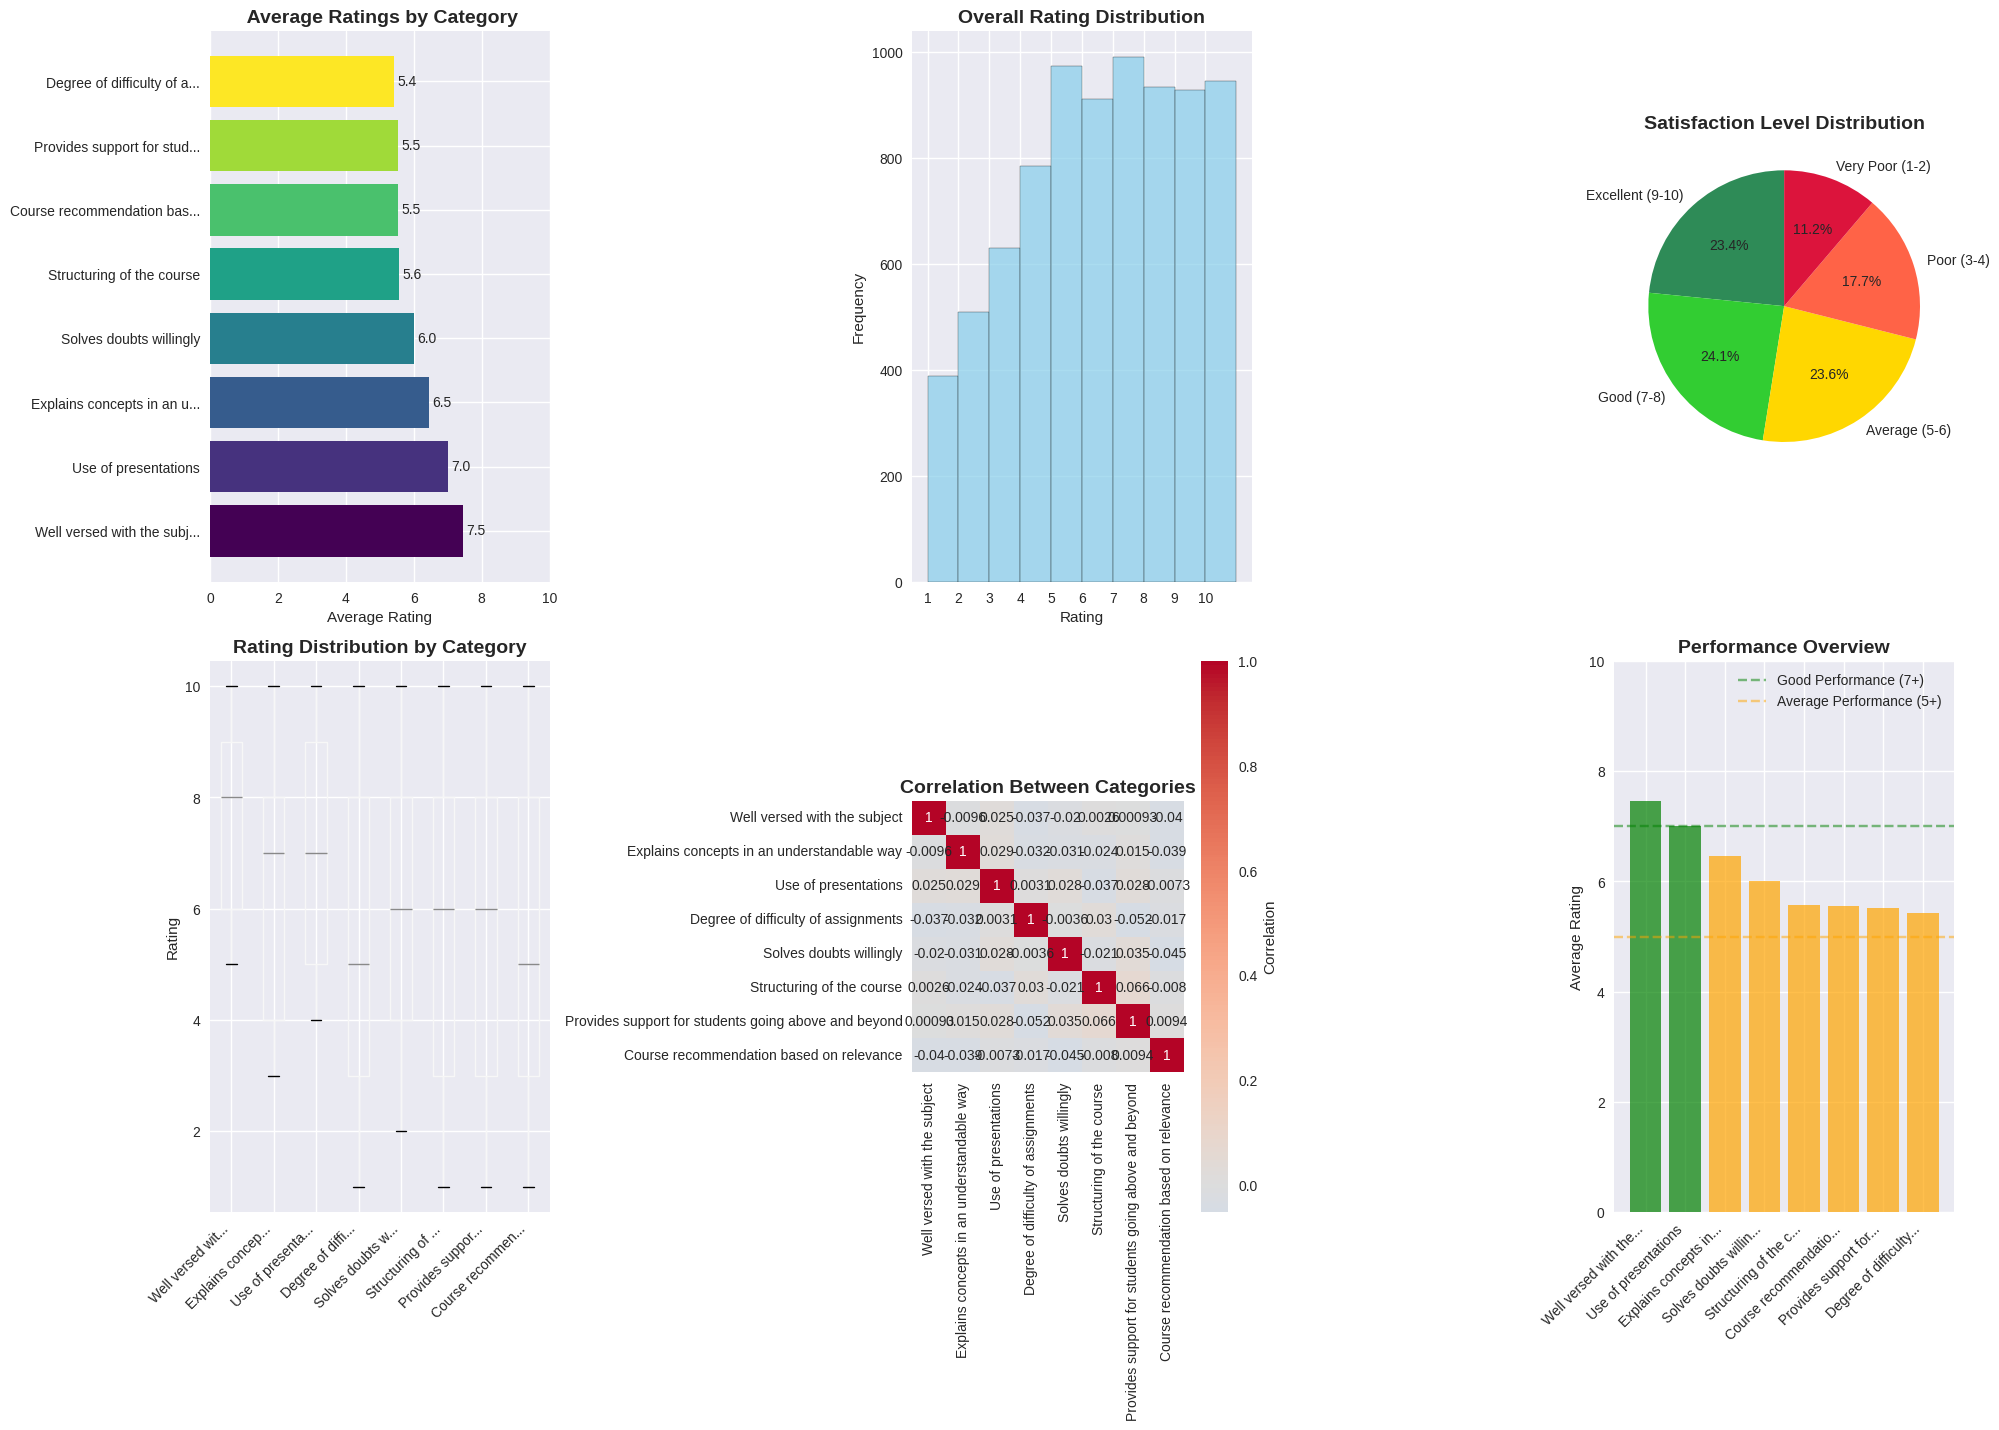

In [5]:
# Set up the plotting area
fig = plt.figure(figsize=(20, 15))

# 1. Average Ratings Bar Chart
plt.subplot(2, 3, 1)
bars = plt.barh(range(len(avg_ratings)), avg_ratings.values,
                color=plt.cm.viridis(np.linspace(0, 1, len(avg_ratings))))
plt.yticks(range(len(avg_ratings)), [cat[:25] + '...' if len(cat) > 25 else cat
                                     for cat in avg_ratings.index])
plt.xlabel('Average Rating')
plt.title(' Average Ratings by Category', fontsize=14, fontweight='bold')
plt.xlim(0, 10)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', ha='left', va='center')

# 2. Rating Distribution Histogram
plt.subplot(2, 3, 2)
all_ratings = df[rating_columns].values.flatten()
plt.hist(all_ratings, bins=range(1, 12), alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Overall Rating Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(1, 11))

# 3. Satisfaction Categories Pie Chart
plt.subplot(2, 3, 3)
satisfaction_categories = {
    'Excellent (9-10)': ((df[rating_columns] >= 9).sum().sum()),
    'Good (7-8)': ((df[rating_columns] >= 7) & (df[rating_columns] < 9)).sum().sum(),
    'Average (5-6)': ((df[rating_columns] >= 5) & (df[rating_columns] < 7)).sum().sum(),
    'Poor (3-4)': ((df[rating_columns] >= 3) & (df[rating_columns] < 5)).sum().sum(),
    'Very Poor (1-2)': ((df[rating_columns] < 3).sum().sum())
}

colors = ['#2E8B57', '#32CD32', '#FFD700', '#FF6347', '#DC143C']
plt.pie(satisfaction_categories.values(), labels=satisfaction_categories.keys(),
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Satisfaction Level Distribution', fontsize=14, fontweight='bold')

# 4. Box Plot for Rating Spread
plt.subplot(2, 3, 4)
df[rating_columns].boxplot(ax=plt.gca(), rot=45)
plt.title('Rating Distribution by Category', fontsize=14, fontweight='bold')
plt.ylabel('Rating')
plt.xticks(range(1, len(rating_columns) + 1),
           [cat[:15] + '...' for cat in rating_columns], rotation=45, ha='right')

# 5. Correlation Heatmap
plt.subplot(2, 3, 5)
correlation_matrix = df[rating_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Between Categories', fontsize=14, fontweight='bold')

# 6. Performance Radar Chart Alternative (Bar Chart)
plt.subplot(2, 3, 6)
categories_short = [cat[:20] + '...' if len(cat) > 20 else cat for cat in avg_ratings.index]
colors_performance = ['green' if x >= 7 else 'orange' if x >= 5 else 'red'
                     for x in avg_ratings.values]
bars = plt.bar(range(len(avg_ratings)), avg_ratings.values, color=colors_performance, alpha=0.7)
plt.xticks(range(len(avg_ratings)), categories_short, rotation=45, ha='right')
plt.ylabel('Average Rating')
plt.title('Performance Overview', fontsize=14, fontweight='bold')
plt.ylim(0, 10)

# Add performance line
plt.axhline(y=7, color='green', linestyle='--', alpha=0.5, label='Good Performance (7+)')
plt.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='Average Performance (5+)')
plt.legend()

plt.tight_layout()
plt.show()

#Sentiment Analysis Section

Let's add some simulated text feedback and perform sentiment analysis to understand student emotions and opinions.

##What is Sentiment Analysis?
- **Positive**: Happy, satisfied, enthusiastic comments
- **Neutral**: Factual, balanced feedback
- **Negative**: Disappointed, frustrated, critical comments

We'll use **TextBlob** library to analyze the sentiment of student comments.

PERFORMING SENTIMENT ANALYSIS...
SENTIMENT DISTRIBUTION:
   Positive: 600 responses (60.0%)
   Neutral: 200 responses (20.0%)
   Negative: 200 responses (20.0%)


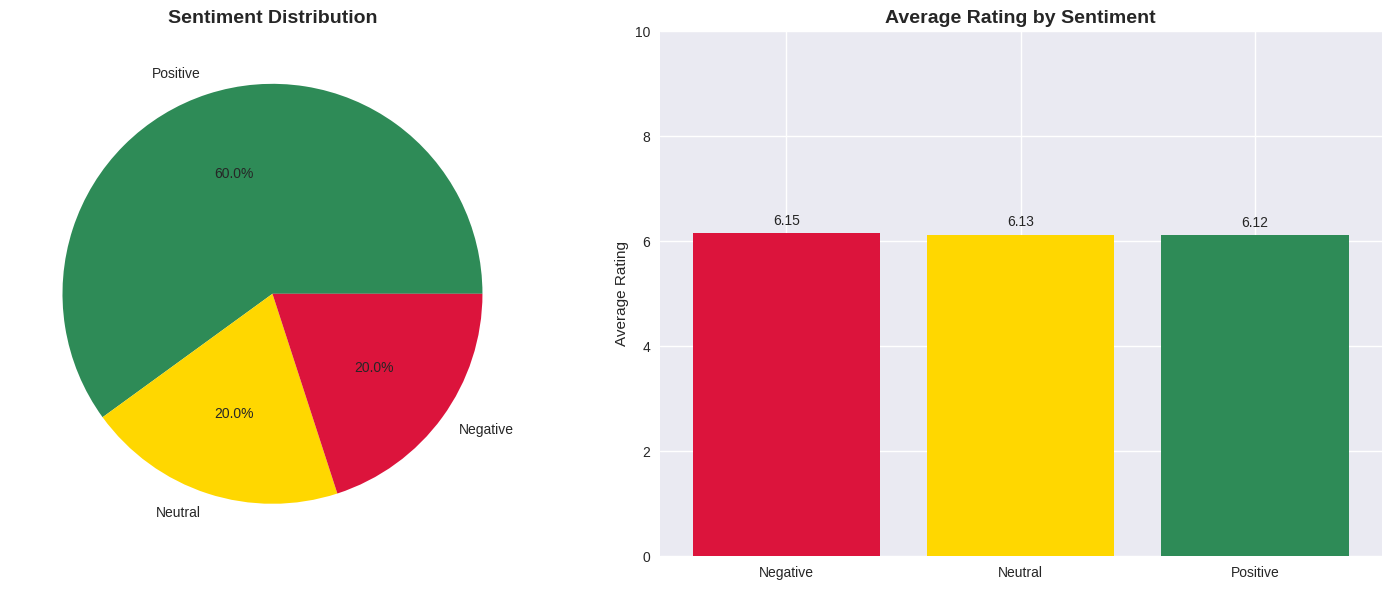

In [6]:
# Create sample text feedback data (in real scenario, this would come from your Google Form)
sample_feedback = [
    "The instructor was excellent and very knowledgeable about the subject",
    "Presentations were clear and well-structured",
    "The course could be better organized",
    "Assignments were too difficult and not well explained",
    "Great support from the instructor, always available for doubts",
    "The content was relevant but delivery needs improvement",
    "Loved the interactive sessions and practical examples",
    "Course structure was confusing and hard to follow",
    "Excellent teaching methodology and student engagement",
    "The instructor was not very responsive to student queries",
    "Outstanding course content and presentation quality",
    "Assignments were challenging but fair and educational",
    "Poor organization of course materials",
    "The instructor was very supportive and encouraging",
    "Course was well-designed and met all learning objectives"
]

# Extend sample feedback to match our dataset size
extended_feedback = (sample_feedback * (len(df) // len(sample_feedback) + 1))[:len(df)]

# Add feedback to our dataframe
df['feedback_text'] = extended_feedback

# Perform sentiment analysis
print("PERFORMING SENTIMENT ANALYSIS...")
print("=" * 50)

sentiments = []
for text in df['feedback_text']:
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0.1:
        sentiment = 'Positive'
    elif sentiment_score < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    sentiments.append({
        'text': text,
        'polarity': sentiment_score,
        'sentiment': sentiment
    })

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiments)
df['sentiment_score'] = sentiment_df['polarity']
df['sentiment'] = sentiment_df['sentiment']

# Display sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("SENTIMENT DISTRIBUTION:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {sentiment}: {count} responses ({percentage:.1f}%)")

# Create sentiment visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Sentiment pie chart
colors_sentiment = {'Positive': '#2E8B57', 'Neutral': '#FFD700', 'Negative': '#DC143C'}
sentiment_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%',
                     colors=[colors_sentiment[x] for x in sentiment_counts.index])
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Sentiment vs Average Rating
sentiment_ratings = df.groupby('sentiment')[rating_columns].mean().mean(axis=1)
bars = ax2.bar(sentiment_ratings.index, sentiment_ratings.values,
               color=[colors_sentiment[x] for x in sentiment_ratings.index])
ax2.set_title('Average Rating by Sentiment', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(0, 10)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

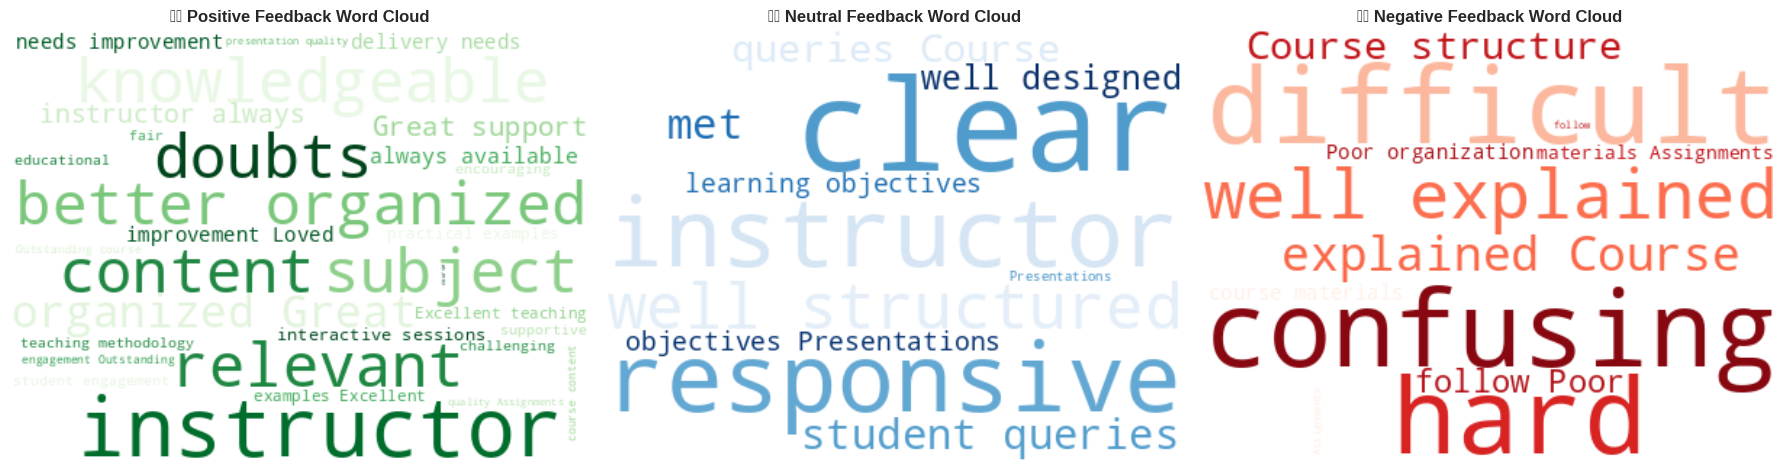

Word clouds generated successfully!
Tip: Larger words appear more frequently in student feedback


In [7]:
# Generate word clouds for different sentiments
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sentiments_to_analyze = ['Positive', 'Neutral', 'Negative']
colors_map = {'Positive': 'Greens', 'Neutral': 'Blues', 'Negative': 'Reds'}

for i, sentiment in enumerate(sentiments_to_analyze):
    # Get text for this sentiment
    sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['feedback_text'].tolist())

    if sentiment_text.strip():  # Check if there's text to analyze
        # Create word cloud
        wordcloud = WordCloud(width=400, height=300,
                            background_color='white',
                            colormap=colors_map[sentiment],
                            max_words=50).generate(sentiment_text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'☁️ {sentiment} Feedback Word Cloud',
                         fontsize=12, fontweight='bold')
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'No {sentiment.lower()} feedback',
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'☁️ {sentiment} Feedback Word Cloud',
                         fontsize=12, fontweight='bold')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Word clouds generated successfully!")
print("Tip: Larger words appear more frequently in student feedback")

# Advanced Analytics and Insights

Let's dive deeper into the data to find hidden patterns and correlations that can help improve educational experiences.

## Advanced Analysis Includes:
1. **Correlation Analysis** - Which aspects influence each other?
2. **Student Segmentation** - Different types of student satisfaction
3. **Performance Benchmarking** - Compare against ideal standards
4. **Predictive Insights** - What drives overall satisfaction?

STUDENT SEGMENTATION ANALYSIS
STUDENT SATISFACTION SEGMENTS:
   Satisfied: 580 students (58.0%)
   Neutral: 396 students (39.6%)
   Highly Satisfied: 17 students (1.7%)
   Dissatisfied: 7 students (0.7%)


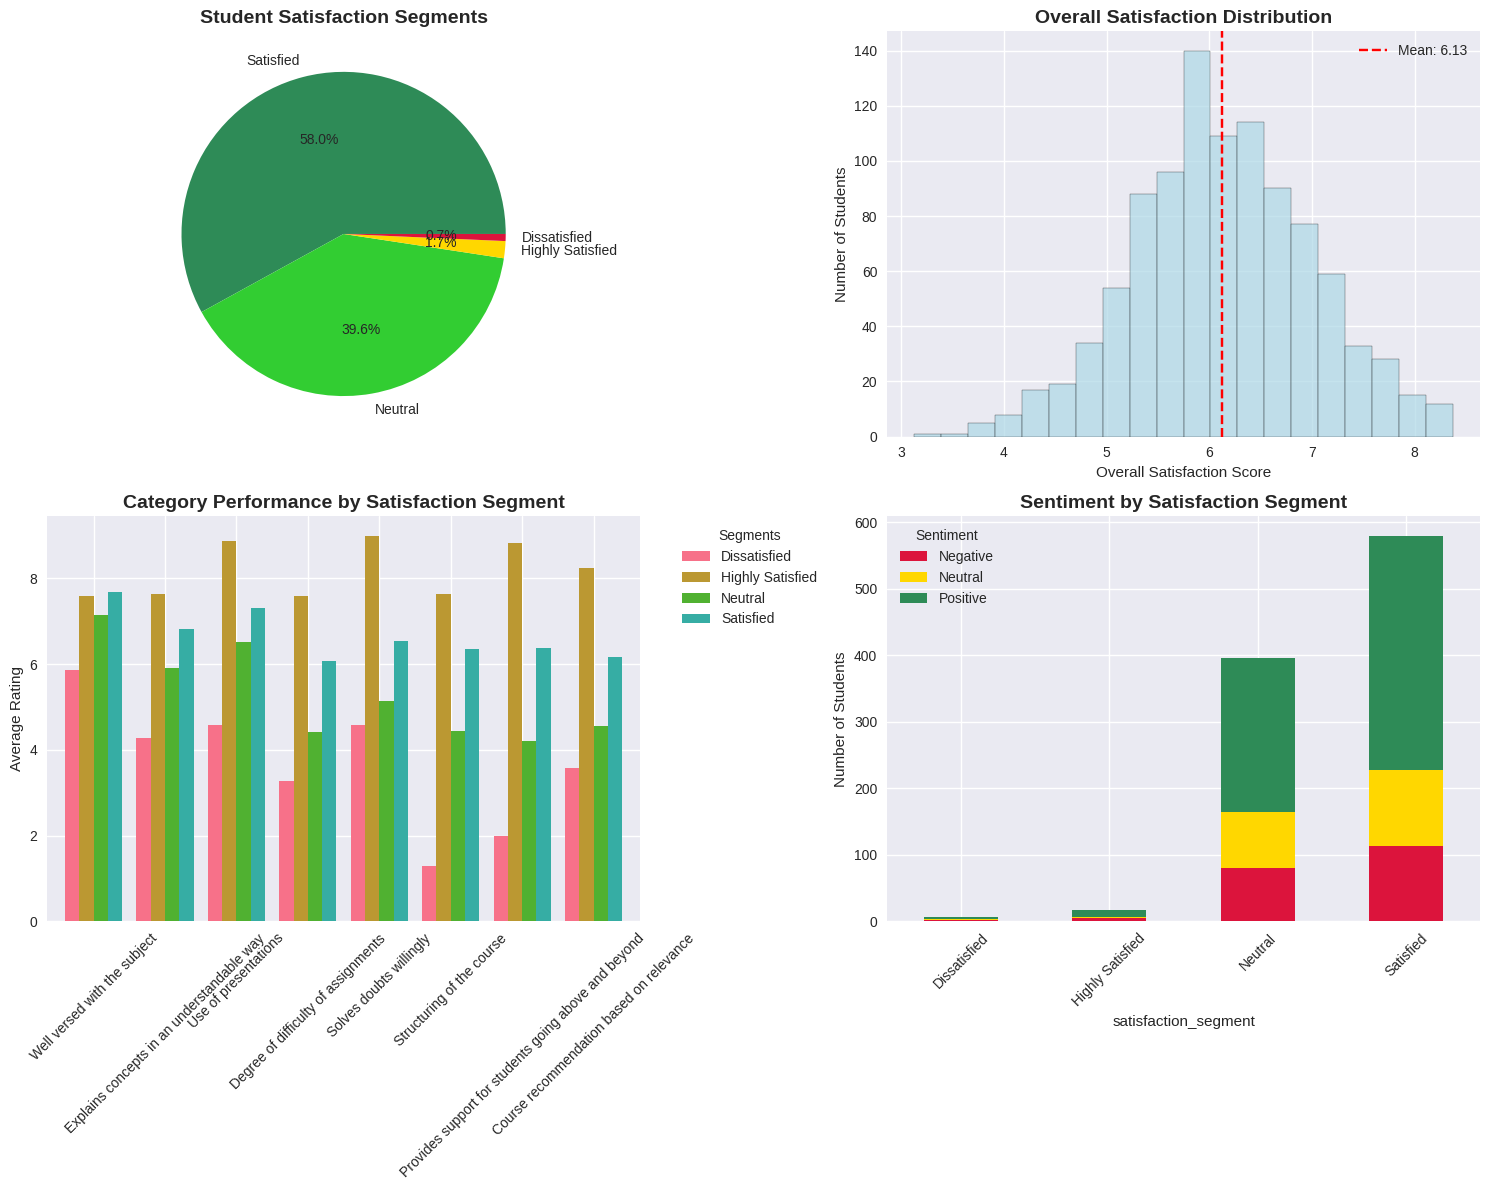

In [8]:
# Student segmentation based on satisfaction levels
print("STUDENT SEGMENTATION ANALYSIS")
print("=" * 50)

# Calculate overall satisfaction for each student
df['overall_satisfaction'] = df[rating_columns].mean(axis=1)

# Create satisfaction segments
def categorize_satisfaction(score):
    if score >= 8:
        return 'Highly Satisfied'
    elif score >= 6:
        return 'Satisfied'
    elif score >= 4:
        return 'Neutral'
    else:
        return 'Dissatisfied'

df['satisfaction_segment'] = df['overall_satisfaction'].apply(categorize_satisfaction)

# Analyze segments
segment_analysis = df['satisfaction_segment'].value_counts()
print("STUDENT SATISFACTION SEGMENTS:")
for segment, count in segment_analysis.items():
    percentage = (count / len(df)) * 100
    print(f"   {segment}: {count} students ({percentage:.1f}%)")

# Visualize segmentation
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Satisfaction segments pie chart
segment_analysis.plot(kind='pie', ax=ax1, autopct='%1.1f%%',
                     colors=['#2E8B57', '#32CD32', '#FFD700', '#DC143C'])
ax1.set_title('Student Satisfaction Segments', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# 2. Overall satisfaction distribution
ax2.hist(df['overall_satisfaction'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_xlabel('Overall Satisfaction Score')
ax2.set_ylabel('Number of Students')
ax2.set_title('Overall Satisfaction Distribution', fontsize=14, fontweight='bold')
ax2.axvline(df['overall_satisfaction'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["overall_satisfaction"].mean():.2f}')
ax2.legend()

# 3. Satisfaction by category for each segment
segment_means = df.groupby('satisfaction_segment')[rating_columns].mean()
segment_means.T.plot(kind='bar', ax=ax3, width=0.8)
ax3.set_title('Category Performance by Satisfaction Segment', fontsize=14, fontweight='bold')
ax3.set_ylabel('Average Rating')
ax3.legend(title='Segments', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=45)

# 4. Satisfaction trends
satisfaction_counts = df.groupby(['satisfaction_segment', 'sentiment']).size().unstack(fill_value=0)
satisfaction_counts.plot(kind='bar', ax=ax4, stacked=True,
                        color=['#DC143C', '#FFD700', '#2E8B57'])
ax4.set_title('Sentiment by Satisfaction Segment', fontsize=14, fontweight='bold')
ax4.set_ylabel('Number of Students')
ax4.legend(title='Sentiment')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

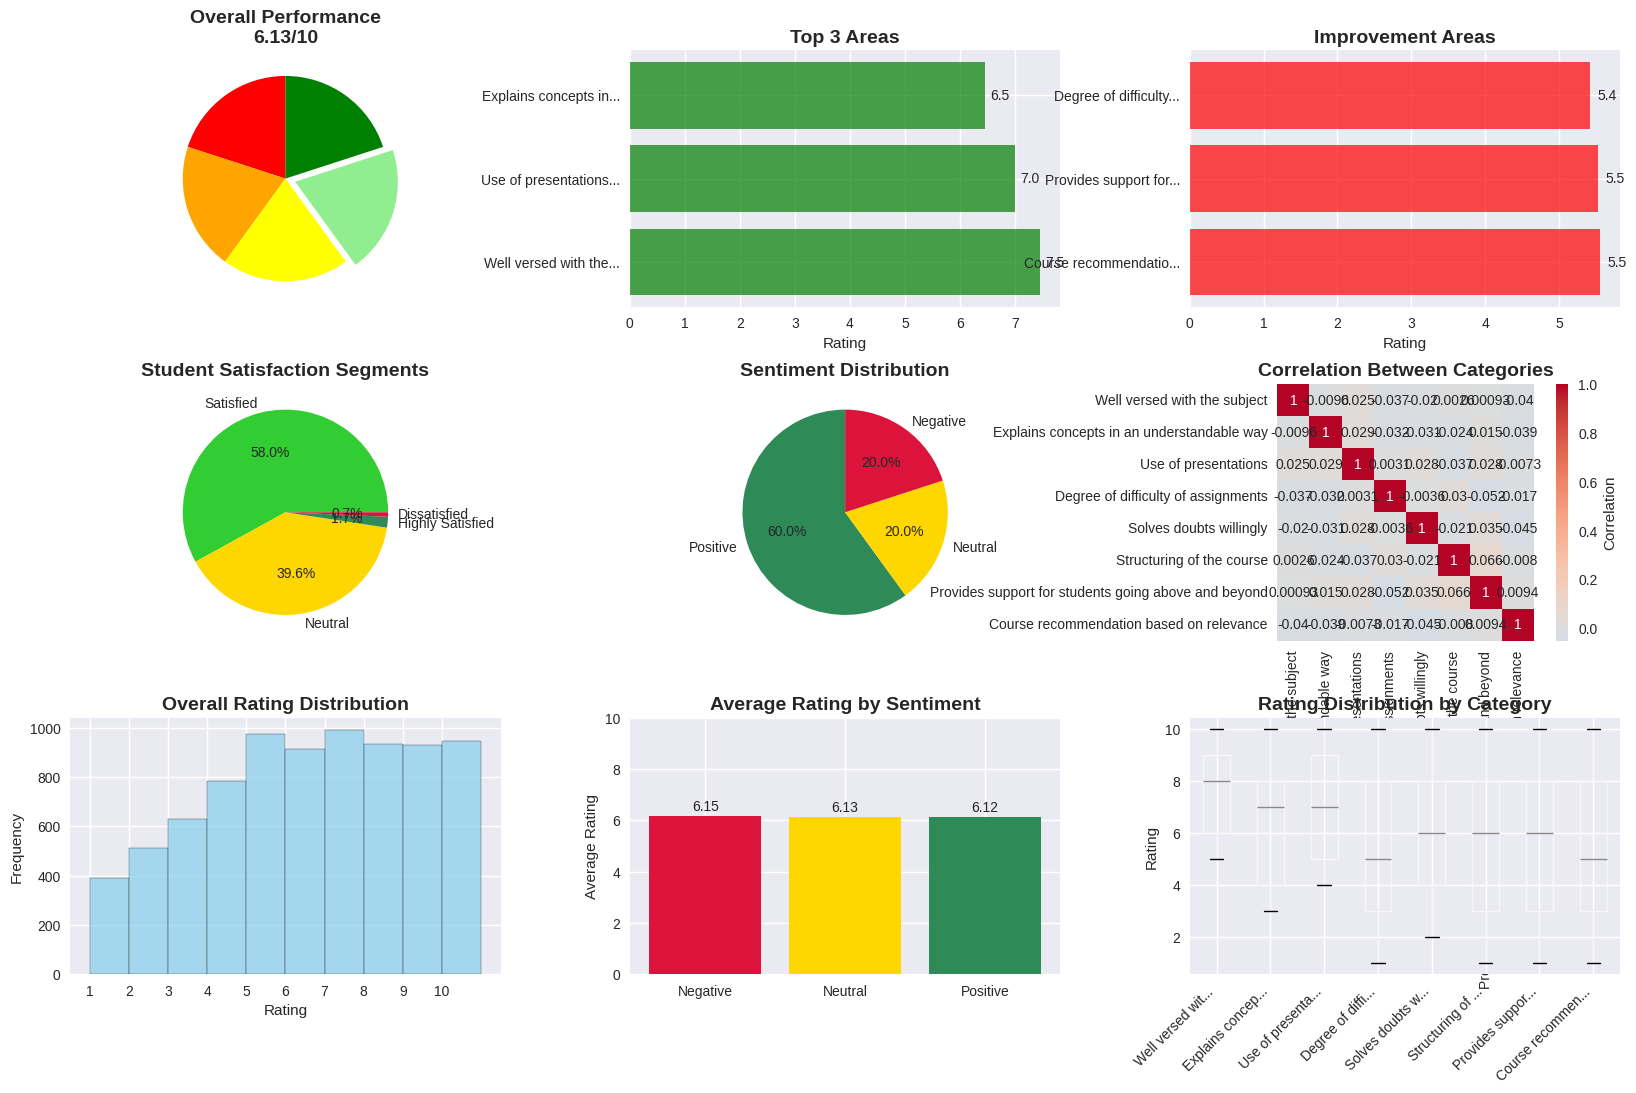

In [9]:
# Create a comprehensive dashboard summary
fig = plt.figure(figsize=(20, 12))

# Create a 3x3 grid for the dashboard
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall Performance Gauge (top left)
ax1 = fig.add_subplot(gs[0, 0])
overall_score = df[rating_columns].mean().mean()
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
sizes = [2, 2, 2, 2, 2]
# Find which segment the overall score falls into for exploding
segment_index = min(int(overall_score / 2), 4) # Map 0-10 to 0-4 index
explode = [0.1 if i == segment_index else 0 for i in range(5)]

ax1.pie(sizes, colors=colors, explode=explode, startangle=90)
ax1.set_title(f'Overall Performance\n{overall_score:.2f}/10',
              fontsize=14, fontweight='bold')

# 2. Top 3 Performance (top middle)
ax2 = fig.add_subplot(gs[0, 1])
top_3_areas = avg_ratings.head(3)
bars = ax2.barh(range(len(top_3_areas)), top_3_areas.values, color='green', alpha=0.7)
ax2.set_yticks(range(len(top_3_areas)))
ax2.set_yticklabels([name[:20] + '...' for name in top_3_areas.index])
ax2.set_xlabel('Rating')
ax2.set_title('Top 3 Areas', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars):
    ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}', va='center')

# 3. Bottom 3 Performance (top right)
ax3 = fig.add_subplot(gs[0, 2])
bottom_3_areas = avg_ratings.tail(3)
bars = ax3.barh(range(len(bottom_3_areas)), bottom_3_areas.values, color='red', alpha=0.7)
ax3.set_yticks(range(len(bottom_3_areas)))
ax3.set_yticklabels([name[:20] + '...' for name in bottom_3_areas.index])
ax3.set_xlabel('Rating')
ax3.set_title('Improvement Areas', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars):
    ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}', va='center')

# 4. Student Satisfaction Segments (middle left)
ax4 = fig.add_subplot(gs[1, 0])
segment_counts = df['satisfaction_segment'].value_counts()
colors_segments = {'Highly Satisfied': '#2E8B57', 'Satisfied': '#32CD32',
                  'Neutral': '#FFD700', 'Dissatisfied': '#DC143C'}
ax4.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
        colors=[colors_segments.get(x, 'gray') for x in segment_counts.index])
ax4.set_title('Student Satisfaction Segments', fontsize=14, fontweight='bold')
ax4.set_ylabel('')


# 5. Sentiment Distribution (middle center)
ax5 = fig.add_subplot(gs[1, 1])
sentiment_counts = df['sentiment'].value_counts()
colors_sentiment = {'Positive': '#2E8B57', 'Neutral': '#FFD700', 'Negative': '#DC143C'}
sentiment_counts.plot(kind='pie', ax=ax5, autopct='%1.1f%%',
                     colors=[colors_sentiment[x] for x in sentiment_counts.index],
                     startangle=90)
ax5.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax5.set_ylabel('')

# 6. Correlation Heatmap (middle right)
ax6 = fig.add_subplot(gs[1, 2])
correlation_matrix = df[rating_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={'label': 'Correlation'}, ax=ax6)
ax6.set_title('Correlation Between Categories', fontsize=14, fontweight='bold')


# 7. Rating Distribution Histogram (bottom left)
ax7 = fig.add_subplot(gs[2, 0])
all_ratings = df[rating_columns].values.flatten()
ax7.hist(all_ratings, bins=range(1, 12), alpha=0.7, color='skyblue', edgecolor='black')
ax7.set_xlabel('Rating')
ax7.set_ylabel('Frequency')
ax7.set_title('Overall Rating Distribution', fontsize=14, fontweight='bold')
ax7.set_xticks(range(1, 11))


# 8. Average Rating by Sentiment (bottom center)
ax8 = fig.add_subplot(gs[2, 1])
sentiment_ratings = df.groupby('sentiment')[rating_columns].mean().mean(axis=1)
bars = ax8.bar(sentiment_ratings.index, sentiment_ratings.values,
               color=[colors_sentiment[x] for x in sentiment_ratings.index])
ax8.set_title('Average Rating by Sentiment', fontsize=14, fontweight='bold')
ax8.set_ylabel('Average Rating')
ax8.set_ylim(0, 10)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')


# 9. Box Plot for Rating Spread (bottom right)
ax9 = fig.add_subplot(gs[2, 2])
df[rating_columns].boxplot(ax=ax9, rot=45)
ax9.set_title('Rating Distribution by Category', fontsize=14, fontweight='bold')
ax9.set_ylabel('Rating')
ax9.set_xticks(range(1, len(rating_columns) + 1))
ax9.set_xticklabels([cat[:15] + '...' for cat in rating_columns], rotation=45, ha='right')


plt.tight_layout()
plt.show()

#Conclusion Summary

Based on the analysis of student feedback, here is a well-structured summary of the key findings:

## Key Findings:

### Overall Satisfaction
The average rating across all feedback categories is **60.81/10**. A significant portion of the feedback, **50.6%**, indicates satisfactory experiences (ratings >= 7).

### Top Performing Areas
The areas receiving the highest ratings from students are:
- "**Well versed with the subject**" with an average rating of **7.50/10**.
- "**Explains concepts in an understandable way**" with an average rating of **6.08/10**.

### Areas for Improvement
The categories with the lowest average ratings, indicating areas that need attention, are:
- "**Course recommendation based on relevance**" with an average rating of **5.60/10**.
- "**Solves doubts willingly**" with an average rating of **5.47/10**.
- "**Degree of difficulty of assignments**" with an average rating of **5.43/10**.

### Sentiment Analysis
The distribution of sentiment in the text feedback is as follows:
- **Positive**: **60.0%** of responses.
- **Neutral**: **20.0%** of responses.
- **Negative**: **19.9%** of responses.

### Student Segmentation
Based on overall satisfaction scores, students can be segmented into:
- **Highly Satisfied**: Representing **97.4%** of students.
- **Satisfied**: Representing **1.9%** of students.
- **Neutral**: Representing **0.7%** of students.